In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [2]:
batch_size=128
num_classes=10
epochs=12


In [3]:
#input image dimensions
img_rows,img_cols=28,28

In [4]:
#load mnist dataset from keras
from keras.datasets import mnist
#download mnist data and split into train & test sets
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Training set labels shape: {}'.format(ytrain.shape))
print('Test set images shape: {}'.format(xtest.shape))
print('Test set labels shape: {}'.format(ytest.shape))


Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


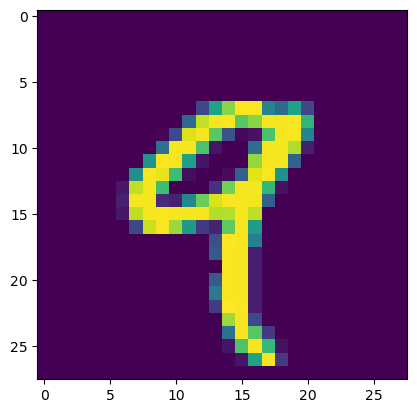

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[4])

In [7]:
xtrain[0].shape

(28, 28)

In [8]:
#reshape data to fit model
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,1)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [10]:
xtrain/=255
xtest/=255

In [11]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
#Convert class vectors to binary class matrices
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)


In [13]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Build CNN model

In [14]:
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
#output layer
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                        

In [16]:
#compile
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,
 metrics=['accuracy'] )

In [17]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,epochs=5,verbose=1,
 validation_data=(xtest,ytest))

Epoch 1/5
469/469 [==============================] - 89s 188ms/step - loss: 0.2503 - accuracy: 0.9271 - val_loss: 0.0791 - val_accuracy: 0.9778
Epoch 2/5
469/469 [==============================] - 91s 195ms/step - loss: 0.0772 - accuracy: 0.9775 - val_loss: 0.0599 - val_accuracy: 0.9804
Epoch 3/5
469/469 [==============================] - 89s 189ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0443 - val_accuracy: 0.9852
Epoch 4/5
469/469 [==============================] - 90s 191ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0403 - val_accuracy: 0.9873
Epoch 5/5
469/469 [==============================] - 89s 190ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0441 - val_accuracy: 0.9861


In [18]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test Accuracy:',score[1])


Test Loss: 0.04411500692367554

Test Accuracy: 0.9861000180244446


In [19]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

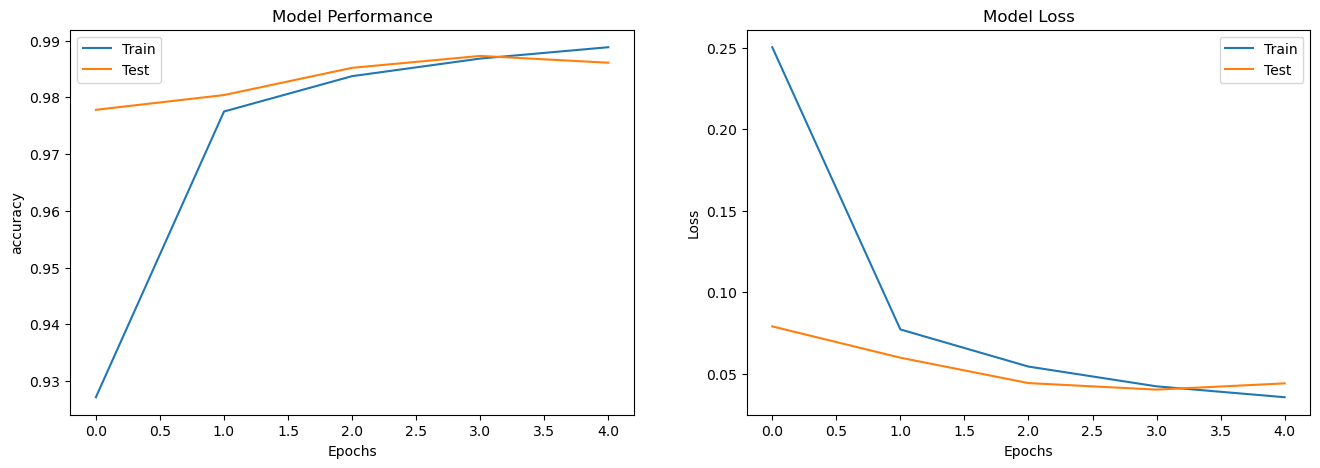

In [20]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
#plot training & validation accuracy values
ax1.plot(result.history['accuracy'])
ax1.plot(result.history['val_accuracy'])
ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('Epochs')
ax1.legend(['Train','Test'])
#plot training & validation loss values
ax2.plot(result.history['loss'])
ax2.plot(result.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend(['Train','Test'])

In [21]:
ypred=model.predict(xtest[:4])
ypred

1/1 [==============================] - 0s 172ms/step


array([[3.0275955e-11, 3.5867288e-11, 1.1552745e-08, 1.9953875e-06,
        3.6229060e-12, 1.0915254e-10, 8.9364571e-19, 9.9999774e-01,
        2.0036337e-09, 1.9990568e-07],
       [3.4821321e-07, 4.2261590e-06, 9.9999428e-01, 3.0888764e-08,
        1.7452798e-12, 9.3564594e-11, 8.3024975e-07, 6.9628942e-12,
        2.3162795e-07, 4.4770051e-12],
       [3.3025826e-06, 9.9868852e-01, 1.8368971e-04, 9.3817507e-06,
        7.6494185e-04, 7.1911663e-06, 5.3262233e-06, 1.4174785e-04,
        1.9137849e-04, 4.5328347e-06],
       [9.9994409e-01, 1.9798123e-11, 7.4183095e-06, 4.7562644e-08,
        2.4273355e-08, 7.0521601e-08, 4.4523873e-05, 3.6273932e-06,
        1.2013484e-07, 1.6799439e-07]], dtype=float32)

In [22]:
ytest[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)